In [82]:
import nltk
from nltk.corpus import reuters
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
chunks = pd.read_csv('tweets.csv', chunksize=500)
df = next(chunks)

In [84]:
df.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611.0,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1


In [85]:
columns_to_remove = ['user_name', 'user_location', 'user_description', 'user_created','user_followers','user_favourites','user_verified','date','hashtags','user_friends','source']  # Example: Remove columns with specific names
df2 = df.drop(columns=columns_to_remove, inplace=True)

In [86]:
df

,text
0,"#GPT4 for FREE. \nNo its not a clickbait, @Qol..."
1,AI enthusiast
2,ChatGPT Thinks These 5 Crypto Coins Will Explo...
3,New: @JWVance's post about 5 #startups (includ...
4,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...
...,...
495,#ChatGPT set off an endless stream of fear and...
496,ChatGPT is a hot topic; there is no doubt. It ...
497,Exciting news! #chatGPT has launched its Plugi...
498,@Oncrawl Agreed! The #ChatGPT is definitely th...


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [88]:
#nltk.download("wordnet")

 # 2. DATA PREPROCESSING & CLEANING

In [94]:
import re

def preprocess_text(text):
    # TOKENIZE TEXT
    words = word_tokenize(text)
    # REMOVE STOP WORDS
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word.lower() in stop_words]
    # LEMMATIZE TEXT
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # STEMMING THE TEXT
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    # JOINING CLEAN WORDS INTO A STRING
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# APPLY FUNTION TO DATA
df['preprocess'] = df['text'].apply(preprocess_text)

In [95]:
df

,text,preprocess,cleaned
0,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...","# gpt4 free . clickbait , @ qolaba studio chat...",gpt4 free clickbait qolaba studio chatbot ...
1,AI enthusiast,ai enthusiast,ai enthusiast
2,ChatGPT Thinks These 5 Crypto Coins Will Explo...,chatgpt think 5 crypto coin explod year - yaho...,chatgpt think 5 crypto coin explod year yahoo...
3,New: @JWVance's post about 5 #startups (includ...,new : @ jwvanc 's post 5 # startup ( includ @ ...,new jwvanc s post 5 startup includ vcinit...
4,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,🚨get ! 🚨 💰 # binanc spot💰 ⬇ recommend : # shor...,get binanc spot recommend short ticker...
...,...,...,...
495,#ChatGPT set off an endless stream of fear and...,"# chatgpt set endless stream fear despair , cl...",chatgpt set endless stream fear despair clos...
496,ChatGPT is a hot topic; there is no doubt. It ...,chatgpt hot topic ; doubt . chang write publis...,chatgpt hot topic doubt chang write publish ...
497,Exciting news! #chatGPT has launched its Plugi...,"excit news ! # chatgpt launch plugin store , m...",excit news chatgpt launch plugin store mark...
498,@Oncrawl Agreed! The #ChatGPT is definitely th...,@ oncrawl agre ! # chatgpt definit superior ch...,oncrawl agre chatgpt definit superior chatb...


In [96]:
 #FUNCTION FOR CLEANING TEXT
def clean_text(text):
   
    # REMOVE URLs, MENTIONS, HASHTAGS, and EMOJIS
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@[^\s]+", "", text)
    text = re.sub(r"#[^\s]+", "", text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    # NORMALIZE TEXT
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.lower()
    return text

df['cleaned'] = df['preprocess'].apply(clean_text)

In [97]:
df['cleaned']

0       gpt4 free  clickbait   qolaba studio chatbot ...
1                                          ai enthusiast
2      chatgpt think 5 crypto coin explod year  yahoo...
3      new   jwvanc s post 5  startup  includ  vcinit...
4      get     binanc spot  recommend   short  ticker...
                             ...                        
495     chatgpt set endless stream fear despair  clos...
496    chatgpt hot topic  doubt  chang write publish ...
497    excit news   chatgpt launch plugin store  mark...
498     oncrawl agre   chatgpt definit superior chatb...
499    agre whatev put internet nt go away  watch ful...
Name: cleaned, Length: 500, dtype: object

In [98]:
df

,text,preprocess,cleaned
0,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...","# gpt4 free . clickbait , @ qolaba studio chat...",gpt4 free clickbait qolaba studio chatbot ...
1,AI enthusiast,ai enthusiast,ai enthusiast
2,ChatGPT Thinks These 5 Crypto Coins Will Explo...,chatgpt think 5 crypto coin explod year - yaho...,chatgpt think 5 crypto coin explod year yahoo...
3,New: @JWVance's post about 5 #startups (includ...,new : @ jwvanc 's post 5 # startup ( includ @ ...,new jwvanc s post 5 startup includ vcinit...
4,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,🚨get ! 🚨 💰 # binanc spot💰 ⬇ recommend : # shor...,get binanc spot recommend short ticker...
...,...,...,...
495,#ChatGPT set off an endless stream of fear and...,"# chatgpt set endless stream fear despair , cl...",chatgpt set endless stream fear despair clos...
496,ChatGPT is a hot topic; there is no doubt. It ...,chatgpt hot topic ; doubt . chang write publis...,chatgpt hot topic doubt chang write publish ...
497,Exciting news! #chatGPT has launched its Plugi...,"excit news ! # chatgpt launch plugin store , m...",excit news chatgpt launch plugin store mark...
498,@Oncrawl Agreed! The #ChatGPT is definitely th...,@ oncrawl agre ! # chatgpt definit superior ch...,oncrawl agre chatgpt definit superior chatb...


In [99]:
 df['cleaned'].str.len().max()

586

In [104]:
df['text'].str.len().min()

13

In [120]:
df["cleaned"]

0       gpt4 free  clickbait   qolaba studio chatbot ...
1                                          ai enthusiast
2      chatgpt think 5 crypto coin explod year  yahoo...
3      new   jwvanc s post 5  startup  includ  vcinit...
4      get     binanc spot  recommend   short  ticker...
                             ...                        
495     chatgpt set endless stream fear despair  clos...
496    chatgpt hot topic  doubt  chang write publish ...
497    excit news   chatgpt launch plugin store  mark...
498     oncrawl agre   chatgpt definit superior chatb...
499    agre whatev put internet nt go away  watch ful...
Name: cleaned, Length: 500, dtype: object

# 3. N-GRAMS

In [136]:
# stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [137]:
set_stopwords = set(stopwords.words('english'))

In [138]:
set_stopwords_xnot=[item for item in set_stopwords if item not in ['no','not'] ]

In [139]:
# util func to convert stringified list to list
def to_list(strg_list):
    return strg_list.strip("[]").replace("'","").replace('"',"").replace(",","").split() 

In [140]:
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

In [141]:
df['unigram']=[(to_list(strg_list)) for strg_list in df['cleaned']]
df['unigramf']=[[item for item in list_item if item not in set_stopwords ] for list_item in df['unigram']]
df[['cleaned','unigram','unigramf']][0:5]

,cleaned,unigram,unigramf
0,gpt4 free clickbait qolaba studio chatbot ...,"[gpt4, free, clickbait, qolaba, studio, chatbo...","[gpt4, free, clickbait, qolaba, studio, chatbo..."
1,ai enthusiast,"[ai, enthusiast]","[ai, enthusiast]"
2,chatgpt think 5 crypto coin explod year yahoo...,"[chatgpt, think, 5, crypto, coin, explod, year...","[chatgpt, think, 5, crypto, coin, explod, year..."
3,new jwvanc s post 5 startup includ vcinit...,"[new, jwvanc, s, post, 5, startup, includ, vci...","[new, jwvanc, post, 5, startup, includ, vcinit..."
4,get binanc spot recommend short ticker...,"[get, binanc, spot, recommend, short, ticker, ...","[get, binanc, spot, recommend, short, ticker, ..."


In [142]:
from collections import Counter
from nltk.lm.preprocessing import flatten
count_1gram= Counter (flatten(list_item for list_item in df['unigram']))
print(len(count_1gram))
print(count_1gram)
count_1gramf= Counter (flatten(list_item for list_item in df['unigramf']))
print(len(count_1gramf))
print(sorted(list(count_1gramf.items()),key=itemgetter(1),reverse=True)[0:100])

3429
Counter({'chatgpt': 619, 'http': 510, 'ai': 301, 'openai': 107, 's': 94, 'use': 73, 'time': 54, 'short': 42, 'gpt4': 40, 'power': 40, 'generativeai': 39, 'prompt': 35, 'artificialintellig': 35, 'amp': 34, 'get': 34, 'like': 33, 'bard': 31, 'learn': 31, 'nt': 31, 'gener': 30, 'new': 29, 'free': 28, 'googl': 27, 'chatbot': 26, 'make': 26, 'rsi': 25, 'tool': 25, 'creat': 24, 'write': 23, 'recommend': 22, 'last': 22, 'potenti': 21, 'price': 21, 'technolog': 21, 'midjourney': 21, 'plugin': 21, 'ticker': 20, 'long': 20, 'share': 20, 'human': 20, 'ask': 20, 'bardai': 20, 'u': 20, 'think': 19, 'na': 19, 'wait': 19, 'data': 19, 'gpt': 19, 'work': 19, 'nft': 18, 'market': 18, 'one': 18, 'educ': 18, 'experi': 18, 'autom': 18, 'custom': 18, 'spot': 17, 'gon': 17, 'follow': 17, 'want': 17, 'world': 17, 'busi': 17, 'llm': 16, 'say': 16, 'latest': 16, 'success': 16, 'know': 16, 'binanc': 15, 'interv': 15, 'take': 15, 'look': 15, 'model': 15, 'guid': 15, 'help': 15, 'need': 15, 'tri': 15, 'app': 

NameError: name 'itemgetter' is not defined

In [143]:
import nltk
#create list from bigrams generator
df['bigram']=[list(nltk.bigrams(to_list(strg_list)))for strg_list in df['cleaned']]
df['bigramf']=[[x for x in list_item if not any(y for y in set_stopwords_xnot if y in x) ] for list_item in df['bigram']]
df[['bigram','bigramf']][0:5]

,bigram,bigramf
0,"[(gpt4, free), (free, clickbait), (clickbait, ...","[(gpt4, free), (free, clickbait), (clickbait, ..."
1,"[(ai, enthusiast)]","[(ai, enthusiast)]"
2,"[(chatgpt, think), (think, 5), (5, crypto), (c...","[(chatgpt, think), (think, 5), (5, crypto), (c..."
3,"[(new, jwvanc), (jwvanc, s), (s, post), (post,...","[(new, jwvanc), (post, 5), (5, startup), (star..."
4,"[(get, binanc), (binanc, spot), (spot, recomme...","[(get, binanc), (binanc, spot), (spot, recomme..."


In [144]:
# create bigram counter
from collections import Counter
from nltk.lm.preprocessing import flatten
import operator
count_2gram= Counter(list(flatten([list_item for list_item in df['bigram']])))
print(len(count_2gram))
print(count_2gram)
count_2gramf= Counter (flatten(list_item for list_item in df['bigramf']))
print(len(count_2gramf))
print(sorted(list(count_2gramf.items()),key=operator.itemgetter(1),reverse=True)[0:100])

7507
Counter({('chatgpt', 'http'): 66, ('ai', 'chatgpt'): 49, ('chatgpt', 'ai'): 39, ('chatgpt', 'openai'): 28, ('power', 'chatgpt'): 25, ('use', 'chatgpt'): 25, ('openai', 'http'): 23, ('last', 'price'): 20, ('openai', 'chatgpt'): 20, ('recommend', 'short'): 18, ('short', 'ticker'): 18, ('short', 'http'): 18, ('gon', 'na'): 17, ('ai', 'openai'): 16, ('ai', 'http'): 16, ('binanc', 'spot'): 15, ('spot', 'recommend'): 15, ('time', 'interv'): 15, ('na', 'long'): 15, ('long', 'wait'): 15, ('wait', 'short'): 15, ('interv', '5min'): 14, ('5min', 'last'): 14, ('chatgpt', 'generativeai'): 13, ('chatgpt', 'plugin'): 13, ('ai', 'generativeai'): 11, ('artifici', 'intellig'): 11, ('generativeai', 'http'): 11, ('gpt4', 'chatgpt'): 11, ('like', 'chatgpt'): 10, ('gener', 'ai'): 10, ('ai', 'artificialintellig'): 9, ('ask', 'chatgpt'): 9, ('artificialintellig', 'chatgpt'): 9, ('openai', 'ai'): 9, ('elon', 'musk'): 8, ('chatgpt', 'gpt4'): 8, ('chatgpt', 'bardai'): 8, ('chatgpt', 'midjourney'): 8, ('ca',

In [145]:
import nltk
#create list from trigrams generator
df['trigram']=[list(nltk.trigrams(to_list(strg_list)))for strg_list in df['cleaned']]
df['trigramf']=[[x for x in list_item if not any(y for y in set_stopwords_xnot if y in x) ] for list_item in df['trigram']]
df[['trigram','trigramf']][0:5]

,trigram,trigramf
0,"[(gpt4, free, clickbait), (free, clickbait, qo...","[(gpt4, free, clickbait), (free, clickbait, qo..."
1,[],[]
2,"[(chatgpt, think, 5), (think, 5, crypto), (5, ...","[(chatgpt, think, 5), (think, 5, crypto), (5, ..."
3,"[(new, jwvanc, s), (jwvanc, s, post), (s, post...","[(post, 5, startup), (5, startup, includ), (st..."
4,"[(get, binanc, spot), (binanc, spot, recommend...","[(get, binanc, spot), (binanc, spot, recommend..."


In [146]:
from collections import Counter
from nltk.lm.preprocessing import flatten
from operator import itemgetter
count_3gram= Counter(list(flatten([list_item for list_item in df['trigram']])))
print(len(count_3gram))
print(list(count_3gram.items())[0:100])
count_3gramf= Counter (flatten(list_item for list_item in df['trigramf']))
print(len(count_3gramf))
print(sorted(list(count_3gramf.items()),key=itemgetter(1),reverse=True)[0:100])

7871
[(('gpt4', 'free', 'clickbait'), 5), (('free', 'clickbait', 'qolaba'), 5), (('clickbait', 'qolaba', 'studio'), 5), (('qolaba', 'studio', 'chatbot'), 5), (('studio', 'chatbot', 'power'), 5), (('chatbot', 'power', 'chatgpt4'), 5), (('power', 'chatgpt4', 'offer'), 5), (('chatgpt4', 'offer', 'chatgptplu'), 5), (('offer', 'chatgptplu', 'free'), 5), (('chatgptplu', 'free', 'use'), 5), (('free', 'use', 'along'), 5), (('use', 'along', 'aiart'), 5), (('along', 'aiart', 'gener'), 5), (('aiart', 'gener', 'allow'), 5), (('gener', 'allow', '1click'), 5), (('allow', '1click', 'nft'), 5), (('1click', 'nft', 'mint'), 5), (('nft', 'mint', 'make'), 5), (('mint', 'make', 'aiartwork'), 5), (('make', 'aiartwork', 'nft'), 5), (('aiartwork', 'nft', 'openai'), 5), (('nft', 'openai', 'openaichatgpt'), 5), (('openai', 'openaichatgpt', 'chatgpt'), 5), (('chatgpt', 'think', '5'), 1), (('think', '5', 'crypto'), 1), (('5', 'crypto', 'coin'), 1), (('crypto', 'coin', 'explod'), 1), (('coin', 'explod', 'year'), 1

In [180]:
import nltk
from nltk.util import everygrams
from operator import itemgetter
count_evgram = Counter(everygrams(list(flatten([list_item for list_item in df['bigram']])), min_len=1, max_len=3))
print(len(count_evgram))
print(list(count_evgram.items())[0:100])
count_evgramf = Counter(everygrams(list(flatten([list_item for list_item in df['bigramf']])), min_len=1, max_len=3))
print(len(count_evgramf))
print(sorted(list(count_evgramf.items()),key=itemgetter(1),reverse=True)[0:100])

24487
[((('gpt4', 'free'),), 5), ((('gpt4', 'free'), ('free', 'clickbait')), 5), ((('gpt4', 'free'), ('free', 'clickbait'), ('clickbait', 'qolaba')), 5), ((('free', 'clickbait'),), 5), ((('free', 'clickbait'), ('clickbait', 'qolaba')), 5), ((('free', 'clickbait'), ('clickbait', 'qolaba'), ('qolaba', 'studio')), 5), ((('clickbait', 'qolaba'),), 5), ((('clickbait', 'qolaba'), ('qolaba', 'studio')), 5), ((('clickbait', 'qolaba'), ('qolaba', 'studio'), ('studio', 'chatbot')), 5), ((('qolaba', 'studio'),), 5), ((('qolaba', 'studio'), ('studio', 'chatbot')), 5), ((('qolaba', 'studio'), ('studio', 'chatbot'), ('chatbot', 'power')), 5), ((('studio', 'chatbot'),), 5), ((('studio', 'chatbot'), ('chatbot', 'power')), 5), ((('studio', 'chatbot'), ('chatbot', 'power'), ('power', 'chatgpt4')), 5), ((('chatbot', 'power'),), 5), ((('chatbot', 'power'), ('power', 'chatgpt4')), 5), ((('chatbot', 'power'), ('power', 'chatgpt4'), ('chatgpt4', 'offer')), 5), ((('power', 'chatgpt4'),), 5), ((('power', 'chat

<BarContainer object of 10 artists>

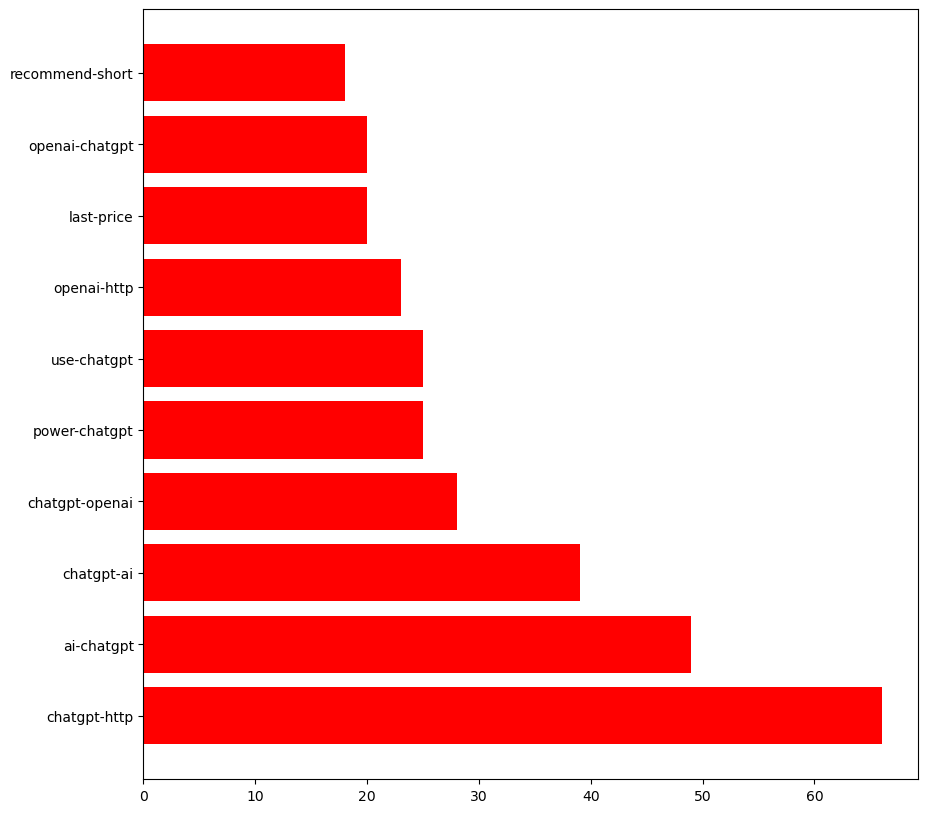

In [181]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

data_bigramf=sorted(list(count_2gramf.items()),key=operator.itemgetter(1),reverse=True)[0:10]

# join the 2 words with '-' in the middle
words = ['-'.join(x) for x, c in data_bigramf ]

# get the counts
width = [c for x, c in data_bigramf]

plt.barh(words, width, color='red')

In [182]:
import nltk
from nltk.util import everygrams
from operator import itemgetter
count_evgram = Counter(everygrams(list(flatten([list_item for list_item in df['trigram']])), min_len=1, max_len=3))
print(len(count_evgram))
print(list(count_evgram.items())[0:100])
count_evgramf = Counter(everygrams(list(flatten([list_item for list_item in df['trigramf']])), min_len=1, max_len=3))
print(len(count_evgramf))
print(sorted(list(count_evgramf.items()),key=itemgetter(1),reverse=True)[0:100])

24251
[((('gpt4', 'free', 'clickbait'),), 5), ((('gpt4', 'free', 'clickbait'), ('free', 'clickbait', 'qolaba')), 5), ((('gpt4', 'free', 'clickbait'), ('free', 'clickbait', 'qolaba'), ('clickbait', 'qolaba', 'studio')), 5), ((('free', 'clickbait', 'qolaba'),), 5), ((('free', 'clickbait', 'qolaba'), ('clickbait', 'qolaba', 'studio')), 5), ((('free', 'clickbait', 'qolaba'), ('clickbait', 'qolaba', 'studio'), ('qolaba', 'studio', 'chatbot')), 5), ((('clickbait', 'qolaba', 'studio'),), 5), ((('clickbait', 'qolaba', 'studio'), ('qolaba', 'studio', 'chatbot')), 5), ((('clickbait', 'qolaba', 'studio'), ('qolaba', 'studio', 'chatbot'), ('studio', 'chatbot', 'power')), 5), ((('qolaba', 'studio', 'chatbot'),), 5), ((('qolaba', 'studio', 'chatbot'), ('studio', 'chatbot', 'power')), 5), ((('qolaba', 'studio', 'chatbot'), ('studio', 'chatbot', 'power'), ('chatbot', 'power', 'chatgpt4')), 5), ((('studio', 'chatbot', 'power'),), 5), ((('studio', 'chatbot', 'power'), ('chatbot', 'power', 'chatgpt4')), 

<BarContainer object of 10 artists>

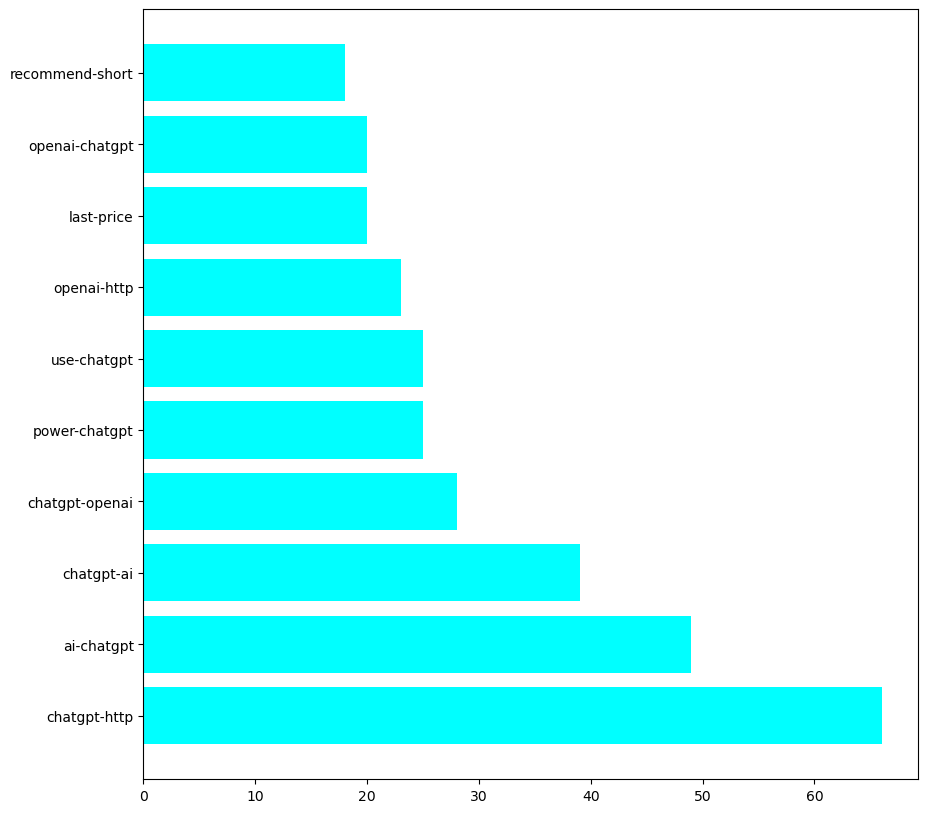

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

data_trigramf=sorted(list(count_2gramf.items()),key=operator.itemgetter(1),reverse=True)[0:10]

# join the 2 words with '-' in the middle
words = ['-'.join(x) for x, c in data_trigramf ]

# get the counts
width = [c for x, c in data_trigramf]

plt.barh(words, width, color='cyan')

# 4. Sentimental Analysis

In [130]:
import matplotlib.pyplot as plt
import random as rand
Temp = [-2, -1, 0, 1, 2]
# create a sentiment analyzer
def sentiment_analysis(text):
    sentiment = rand.choice(Temp)
    if sentiment == 1:
        return "Positive"
    elif sentiment ==  0:
        return "Neutral"
    else :
        return "Negative"

In [132]:
# APPLY FUNTION TO ANALYZE SENTIMENTS
df["sentiment"] = df["cleaned"].apply(sentiment_analysis)

# COUNT THE NUMBER OF +,- AND NEUTRAL TWEETS
positive = df[df["sentiment"] == "Positive"].shape[0]
negative = df[df["sentiment"] == "Negative"].shape[0]
neutral = df[df["sentiment"] == "Neutral"].shape[0]

In [170]:
print("Positive Tweets:", positive)
print()
print("Neutral Tweets:", neutral)
print()
print("Negative Tweets:", negative)

Positive Tweets: 88

Neutral Tweets: 97

Negative Tweets: 315


In [178]:
df['positive'] = positive
df['negative'] = negative
df['neutral'] = neutral

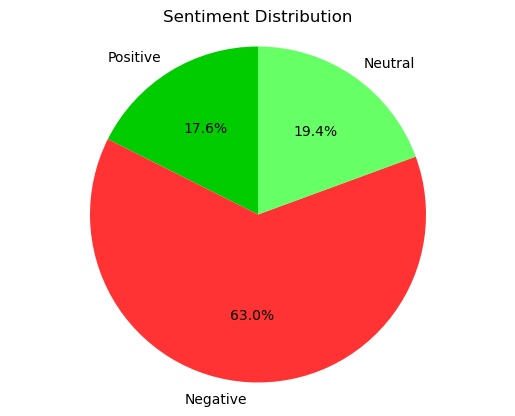

In [171]:
# VISUALIZE THE RESULTS
import matplotlib.pyplot as plt

# Define the labels and sizes for each sentiment category
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]

# Define the colors for each sentiment category
colors = ['#00cc00', '#ff3333', '#66ff66', '#ff0000', '#cccccc']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Sentiment Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


In [172]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

In [173]:
#pip install transformers

In [ ]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

In [175]:
a = list(df['cleaned'])
text = ' '.join(str(e) for e in a)

In [ ]:
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

tokenizer.model_max_length = 512

In [217]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from textblob import TextBlob

In [218]:

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet) 
    
    # set sentiment 
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'


In [219]:
df['sentiment']=df['cleaned'].apply(lambda x: get_tweet_sentiment(' '.join(x)))

In [222]:
Positive_sent = df[df['sentiment']=='positive']
Negative_sent = df[df['sentiment']=='negative']
Neutral_sent = df[df['sentiment']=='neutral']

# 5. Feature Engineering

In [207]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier




# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms
% matplotlib inline

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

UsageError: Line magic function `%` not found.


In [212]:
df['Leng'] = [len(t) for t in df["cleaned"]]

In [213]:
df['Leng']

0      184
1       13
2       94
3      213
4      192
      ... 
495    181
496    200
497    179
498    112
499    236
Name: Leng, Length: 500, dtype: int64

In [216]:
top = Counter([item for sublist in df['cleaned'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['words','count']
temp.style.background_gradient(cmap='Blues')

,words,count
0,,14648
1,t,6861
2,a,5035
3,e,4896
4,i,4193
5,o,3936
6,r,3546
7,c,3485
8,n,3117
9,p,3091


In [230]:
def check_space(string):
     
    # counter
    count = 0
     
    # loop for search each index
    for i in string:
         
        # Check each char
        # is blank or not
        if i == " ":
            count += 1
         
    return count
print("NO. OF SPACES IN TWEETS: ",check_space(text))

NO. OF SPACES IN TWEETS:  15147


In [231]:
number_of_characters = len(text)

print('Number of characters in text file :', number_of_characters)

Number of characters in text file : 75657


In [240]:
def get_postags(row):
    
    postags = nltk.pos_tag(df["cleaned"])
    list_classes = list()
    for  word in postags:
        list_classes.append(word[1])
    
    return list_classes

df["postags"] = df.apply(lambda row: get_postags(row), axis = 1)

In [241]:
df["postags"]

0      [JJ, NN, NN, JJ, NN, NN, NN, JJ, NN, NNP, NN, ...
1      [JJ, NN, NN, JJ, NN, NN, NN, JJ, NN, NNP, NN, ...
2      [JJ, NN, NN, JJ, NN, NN, NN, JJ, NN, NNP, NN, ...
3      [JJ, NN, NN, JJ, NN, NN, NN, JJ, NN, NNP, NN, ...
4      [JJ, NN, NN, JJ, NN, NN, NN, JJ, NN, NNP, NN, ...
                             ...                        
495    [JJ, NN, NN, JJ, NN, NN, NN, JJ, NN, NNP, NN, ...
496    [JJ, NN, NN, JJ, NN, NN, NN, JJ, NN, NNP, NN, ...
497    [JJ, NN, NN, JJ, NN, NN, NN, JJ, NN, NNP, NN, ...
498    [JJ, NN, NN, JJ, NN, NN, NN, JJ, NN, NNP, NN, ...
499    [JJ, NN, NN, JJ, NN, NN, NN, JJ, NN, NNP, NN, ...
Name: postags, Length: 500, dtype: object

In [250]:
def find_no_class(count, class_name = ""):
    total = 0
    for key in count.keys():
        if key.startswith(class_name):
            total += count[key]
            
            
    return total

def get_classes(row, grammatical_class = ""):
    count = Counter(df["cleaned"])
    return find_no_class(count, class_name = grammatical_class)/len(df["cleaned"])


df["Verbs"] = df.apply(lambda row: get_classes(row, "VB"), axis = 1)

In [252]:
df["Verbs"].value_counts()

0.0    500
Name: Verbs, dtype: int64

In [254]:
import re
# Input.
#find all the words starting with 'a' or 'e'
list = re.findall("[Hh]\w+", text)

In [257]:
word_counts = Counter(list)

In [258]:
word_counts

Counter({'hatbot': 27,
         'hatgpt4': 13,
         'hatgptplu': 9,
         'hatgpt': 633,
         'husiast': 2,
         'hink': 21,
         'hoo': 3,
         'http': 513,
         'halleng': 12,
         'hx': 3,
         'h5': 1,
         'hort': 42,
         'hstusdt': 1,
         'hst': 2,
         'haquarktoken': 1,
         'ht': 35,
         'hero': 3,
         'hare': 20,
         'how': 7,
         'hologeneticslab': 2,
         'hologenet': 1,
         'hu4wml': 1,
         'hour': 3,
         'human': 20,
         'hin': 5,
         'hnolog': 23,
         'hether': 5,
         'handl': 5,
         'hereumclass': 1,
         'hattan': 1,
         'he': 1,
         'hn': 2,
         'hon': 8,
         'help': 15,
         'hief': 2,
         'hey': 3,
         'hor': 5,
         'hite': 1,
         'hought': 10,
         'hobia': 1,
         'hic': 5,
         'hip': 9,
         'hilosophi': 4,
         'holog': 1,
         'hr': 8,
         'health': 13,
         'ha

In [259]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 6. VECTORIZATION

In [266]:
# COUNT VECTORIZER
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None) 

In [267]:
bag_of_words = count_vectorizer.fit_transform(df['cleaned'])

In [268]:
len(count_vectorizer.get_feature_names())

3347

In [271]:
# TF-IDF VECTOR
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)    

tfidf = count_vectorizer.fit_transform(df['cleaned'])

len(count_vectorizer.get_feature_names())

3347

In [281]:
# WORD2VEC 
from gensim.models import Word2Vec

sentences = [doc.split() for doc in df['cleaned']]
model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [291]:
import multiprocessing
from time import time 
from gensim.models import Word2Vec

In [292]:
cores = multiprocessing.cpu_count()

In [293]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [294]:
t = time()

w2v_model.build_vocab(text, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [295]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [296]:
w2v_model.init_sims(replace=True)

/var/folders/3s/96jfkb2s7s3drs83jlvf5kjw0000gn/T/ipykernel_1012/514372312.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


# 7. FEATURE SELECTION

In [318]:
chunks = pd.read_csv('tweets.csv', chunksize=500)
df2 = next(chunks)

In [319]:
df2

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Bohmle,"#GPT4 for FREE. \nNo its not a clickbait, @Qol...",Carkingga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AI enthusiast,2019-07-03 03:44:41+00:00,60.0,349.0,611.0,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",Twitter Web App,NaN,NaN
2,Dan Bruno AI,ChatGPT Thinks These 5 Crypto Coins Will Explo...,"Manchester, NH","The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,2023-05-17 18:11:03+00:00,"['chatgpt', 'AI', 'openAI']",dlvr.it
3,Georgiana Comsa,New: @JWVance's post about 5 #startups (includ...,Palo Alto,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,2023-05-17 18:10:25+00:00,"['startups', 'startup50']",Twitter Web App
4,Bitone Great,🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...,Hong Kong,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,2023-05-17 18:09:39+00:00,"['Binance', 'Short', 'GHSTUSDT']",rsi1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,#ChatGPT set off an endless stream of fear and...,"New York, NY","The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,2023-05-17 16:00:37+00:00,['ChatGPT'],Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",ChatGPT is a hot topic; there is no doubt. It ...,"British Columbia, Canada",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,2023-05-17 16:00:37+00:00,NaN,Hootsuite Inc.
497,Tom Solid,Exciting news! #chatGPT has launched its Plugi...,Germany,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,2023-05-17 16:00:30+00:00,['chatGPT'],Hootsuite Inc.
498,Tweeting Monk,@Oncrawl Agreed! The #ChatGPT is definitely th...,GET 30% OFF FOR 3 MONTHS,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,2023-05-17 16:00:28+00:00,['ChatGPT'],TweetingMonk


In [320]:
columns_to_remove = ["text",'date',"hashtags","user_location"]  # Example: Remove columns with specific names
df3 = df2.drop(columns=columns_to_remove, inplace=True)

In [321]:
df2

,user_name,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,source
0,Bohmle,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,60.0,349.0,611.0,False,2023-05-17 18:11:12+00:00,"['GPT4', 'ChatGPT4']",NaN
2,Dan Bruno AI,"The latest in #ChatGPT, #BARD, #Bing, and othe...",2021-05-19 01:19:32+00:00,470.0,157.0,5185,False,dlvr.it
3,Georgiana Comsa,"Founder of Silicon Valley PR, award-winning PR...",2008-12-24 09:32:23+00:00,3864.0,1883.0,2415,False,Twitter Web App
4,Bitone Great,#ChatGPT (AI) powered Free Trading Signal! \nL...,2022-11-21 04:42:18+00:00,1517.0,506.0,64,False,rsi1
...,...,...,...,...,...,...,...,...
495,O'Dwyer's PR News,"The #1 news outlet for public relations, publi...",2009-02-25 15:50:27+00:00,15013.0,2876.0,1,False,Twitter Web App
496,"Tracy Krauss, #author #artist #playwright",I write modern Christian romance with a twist ...,2010-06-19 04:45:43+00:00,2718.0,1803.0,348,False,Hootsuite Inc.
497,Tom Solid,🚀✨ We help you to build your productivity syst...,2010-12-04 11:00:53+00:00,3460.0,332.0,4464,False,Hootsuite Inc.
498,Tweeting Monk,Set your Twitter account on auto-pilot and wat...,2022-03-30 10:35:13+00:00,50.0,111.0,64,False,TweetingMonk


In [322]:
corr = df2.corr(method='pearson')
corr.head()

,user_followers
user_followers,1.0


In [332]:
df2.dtypes

user_name            object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
source               object
dtype: object

In [333]:
print(df2.isnull().any())

user_name           True
user_description    True
user_created        True
user_followers      True
user_friends        True
user_favourites     True
user_verified       True
source              True
dtype: bool


In [336]:
result = df2.dropna(how='all', axis=1, inplace=True)
result

In [337]:
df2.nunique()

user_name           392
user_description    372
user_created        392
user_followers      326
user_friends        343
user_favourites     344
user_verified         2
source               57
dtype: int64

In [338]:
df2.corr()

,user_followers
user_followers,1.0


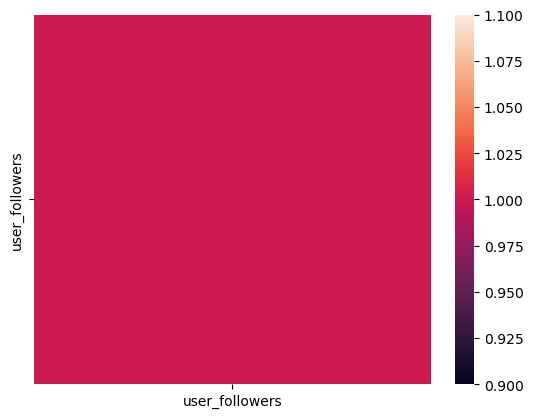

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df2.corr())
plt.show()

# 8. PREPARE DATASETS AND MODELS

In [343]:
from sklearn.feature_extraction.text import TfidfVectorizer

# APPLYING TF-IDF VECTORIZER
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df["cleaned"])

# VACABULARY OF TF-IDF VECTORIZER
print(tfidf_vectorizer.vocabulary_)

{'gpt4': 415, 'free': 383, 'clickbait': 192, 'qolaba': 691, 'studio': 842, 'chatbot': 172, 'power': 656, 'chatgpt4': 173, 'offer': 603, 'chatgptplu': 178, 'use': 941, 'aiart': 42, 'gener': 400, 'allow': 53, '1click': 4, 'nft': 593, 'mint': 566, 'make': 537, 'aiartwork': 46, 'openai': 608, 'openaichatgpt': 609, 'ai': 41, 'enthusiast': 323, 'think': 888, 'crypto': 244, 'year': 997, 'yahoo': 995, 'financ': 375, 'http': 452, 'new': 591, 'post': 654, 'startup': 826, 'includ': 461, '1st': 5, 'challeng': 165, 'thx': 895, 'base': 103, 'answer': 66, 'pressur': 662, 'vc': 949, 'record': 714, 'manag': 539, 'team': 869, 'amp': 62, 'growth': 422, 'potenti': 655, 'market': 543, 'binanc': 120, 'spot': 820, 'recommend': 713, 'short': 791, 'ticker': 896, 'time': 897, 'interv': 475, '5min': 14, 'price': 664, 'rsi': 750, '883': 19, 'gon': 406, 'na': 584, 'long': 523, 'wait': 958, 'web': 968, 'digit': 275, 'age': 35, 'navig': 587, 'data': 255, 'predict': 658, 'share': 786, 'knowledg': 491, 'like': 512, 'v

In [347]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score

# create a CountVectorizer object to convert text to a matrix of token counts
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)    

X_train = count_vectorizer.fit_transform(df['cleaned'])
X_test = count_vectorizer.transform(df["cleaned"])

# fit the vectorizer to the training data and transform the training and test data
X_train = tfidf.fit_transform(df["cleaned"])
X_test = tfidf.transform(df["cleaned"])

# create the target variables for the training and test data
y_train = df["sentiment"]
y_test = df["sentiment"]

# create a Naive Bayes classifier and train it on the training data
clf = MultinomialNB()
clf.fit(X_train, y_train)

# make predictions on the test data and evaluate the classifier
y_pred = clf.predict(X_test)
# Evaluate the performance of the model
print("Logistic Regression Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Logistic Regression Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create a Random Forest object
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Random Forest Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
